In [1]:
# unable colab to access git
!git clone https://github.com/yifeica0/ECS171-Group8.git
%cd ECS171-Group8
!git checkout data_preprocessing


Cloning into 'ECS171-Group8'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 58 (delta 23), reused 7 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (58/58), 57.33 MiB | 17.37 MiB/s, done.
Resolving deltas: 100% (23/23), done.
/content/ECS171-Group8
Branch 'data_preprocessing' set up to track remote branch 'data_preprocessing' from 'origin'.
Switched to a new branch 'data_preprocessing'


In [2]:
# update repo informations
!git pull

Already up to date.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# load dataframe
df = pd.read_parquet('amazon_user_reviews.parquet')
meta_df = pd.read_parquet('amazon_metadata.parquet')

In [8]:
# understand df
df.head()
df.columns

Index(['category', 'rating', 'tokens', 'text_cleaned', 'original_text',
       'token_count', 'title', 'images', 'verified_purchase', 'asin',
       'parent_asin', 'user_id', 'datetime', 'helpful_vote'],
      dtype='object')

In [9]:
categories = [
    "All_Beauty",
    "Amazon_Fashion",
    "Appliances",
    "Arts_Crafts_and_Sewing",
    "Automotive",
    "Baby_Products",
    "Beauty_and_Personal_Care",
    "Books",
    "CDs_and_Vinyl",
    "Cell_Phones_and_Accessories",
    "Clothing_Shoes_and_Jewelry",
    "Digital_Music",
    "Electronics",
    "Gift_Cards",
    "Grocery_and_Gourmet_Food",
    "Handmade_Products",
    "Health_and_Household",
    "Health_and_Personal_Care",
    "Home_and_Kitchen",
    "Industrial_and_Scientific",
    "Kindle_Store",
    "Magazine_Subscriptions",
    "Movies_and_TV",
    "Musical_Instruments",
    "Office_Products",
    "Patio_Lawn_and_Garden",
    "Pet_Supplies",
    "Software",
    "Sports_and_Outdoors",
    "Subscription_Boxes",
    "Tools_and_Home_Improvement",
    "Toys_and_Games",
    "Video_Games",
    "Unknown"
]

### Categorical Data Visualization
visualize the difference in rating among products or categories inlucde:
- Boxplot comparing categories
- Popularity of product in each categories

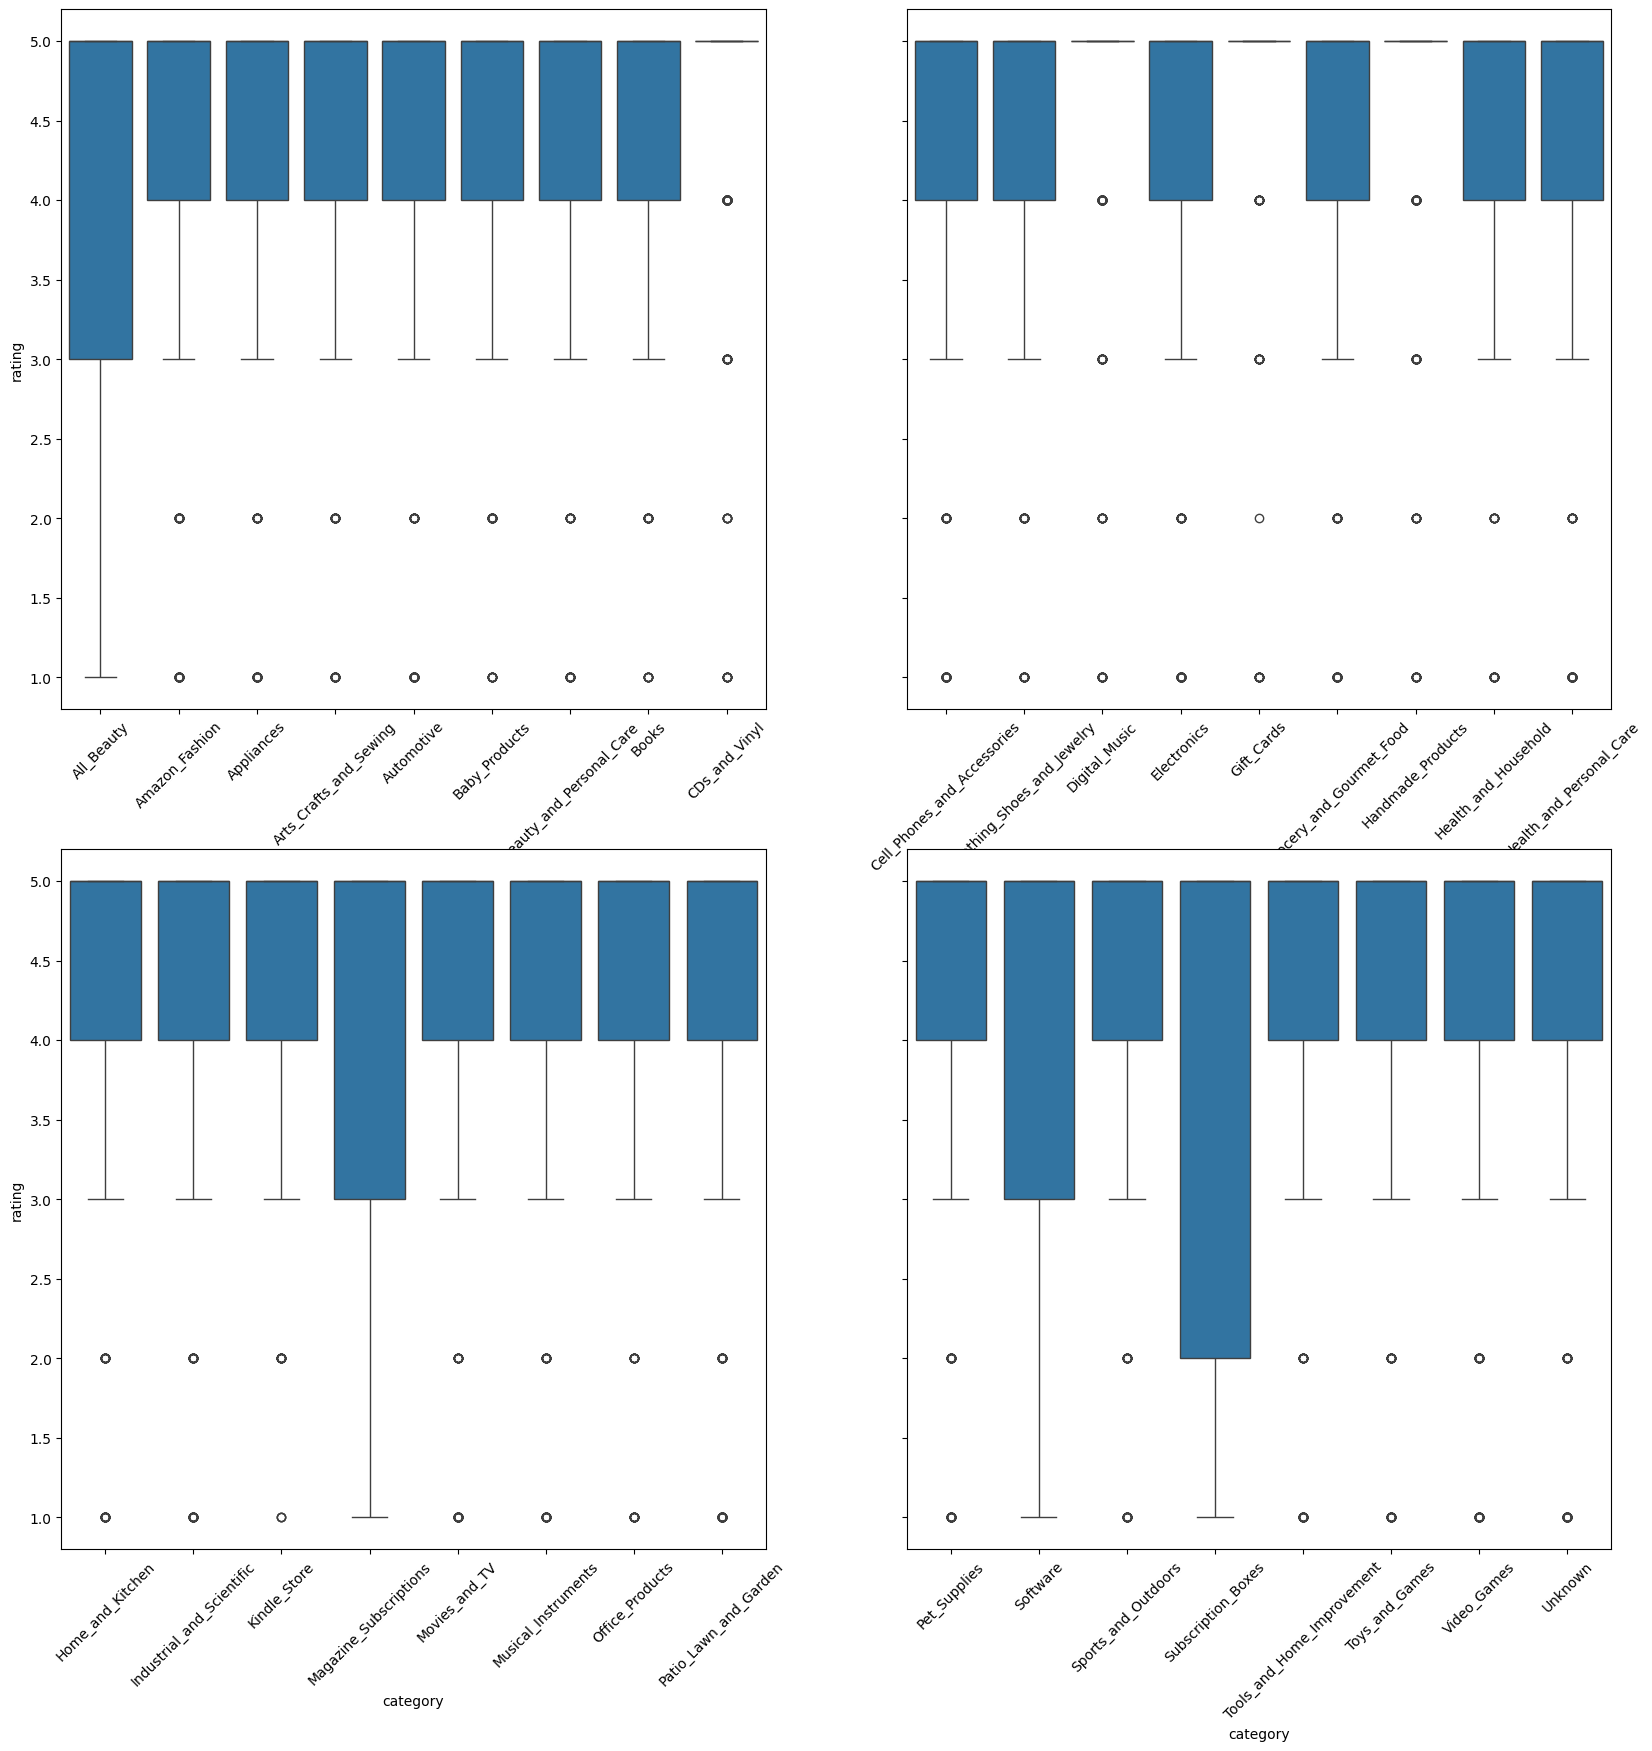

In [10]:
# boxplot to show rating distribution

# create 4 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(20, 20))
axes = axes.flatten()

#split categories into 4 part
parts = np.array_split(categories, 4)

# loop to plot all categories into 4 separate subplots
for i in range(4):
  subdf = df[df['category'].isin(parts[i])]
  sns.boxplot(x='category', y='rating', data=subdf, ax=axes[i])
  axes[i].tick_params(axis='x', rotation=45)

plt.show()

Top reviewed products per category (with titles):


/tmp/ipython-input-4040628894.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_products = valid_products.groupby('category', group_keys=False).apply(lambda x: x.nlargest(10, 'review_count')).reset_index(drop=True)


,category,parent_asin,review_count,title
0,All_Beauty,B07J3H27BJ,1,spoontiques hair and face wraps - multifunctio...
1,All_Beauty,B089CSF11Y,1,"empty brown glass spray bottles2-pack, refilla..."
2,All_Beauty,B08FR3QXYY,1,fountain of truth magic wand sculpting eye rol...
3,Amazon_Fashion,B09WJSHQFL,1,nurse mates womens 12-14 mmgh compression calf...
4,Appliances,B0C57WMPJQ,2,"silonn ice makers countertop, 9 cubes ready in..."
5,Appliances,B00YD2UAA6,1,2-pack replacement for mfi2568aeq refrigerator...
6,Appliances,B09CHFF3ZX,1,mist da97-17376b samsung water filter replacem...
7,Appliances,B0C6CLBBQ1,1,portable washing machine nictemaw 17.6lbs capa...
8,Arts_Crafts_and_Sewing,B01INAVHH8,1,sakura 48020 4-piece permapaque opaque blister...
9,Automotive,B01LZOVXSR,1,"green oracal 651 vinyl pinstriping, pinstripes..."


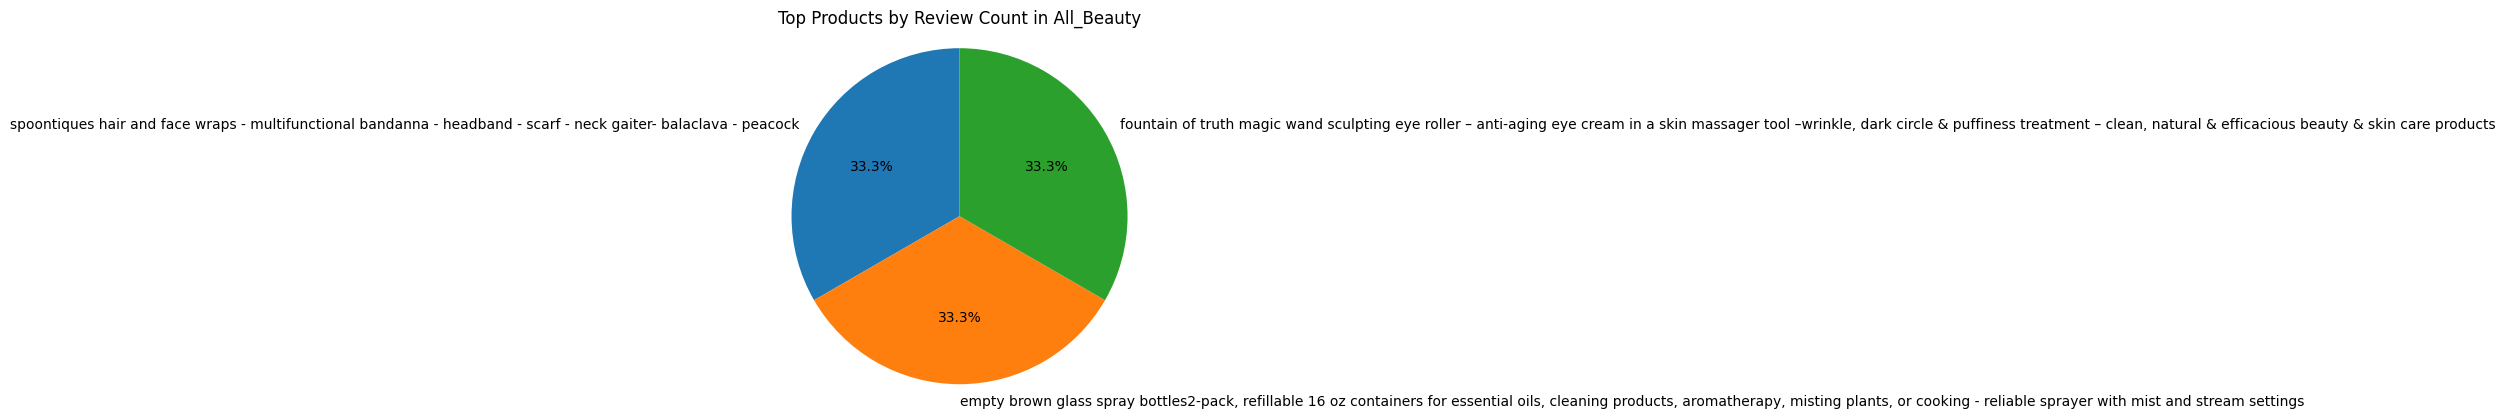

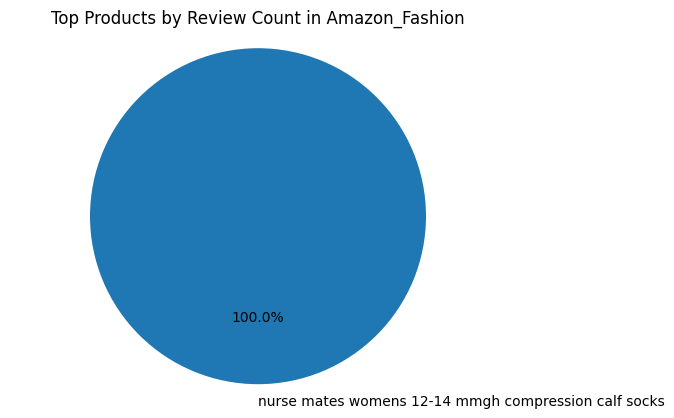

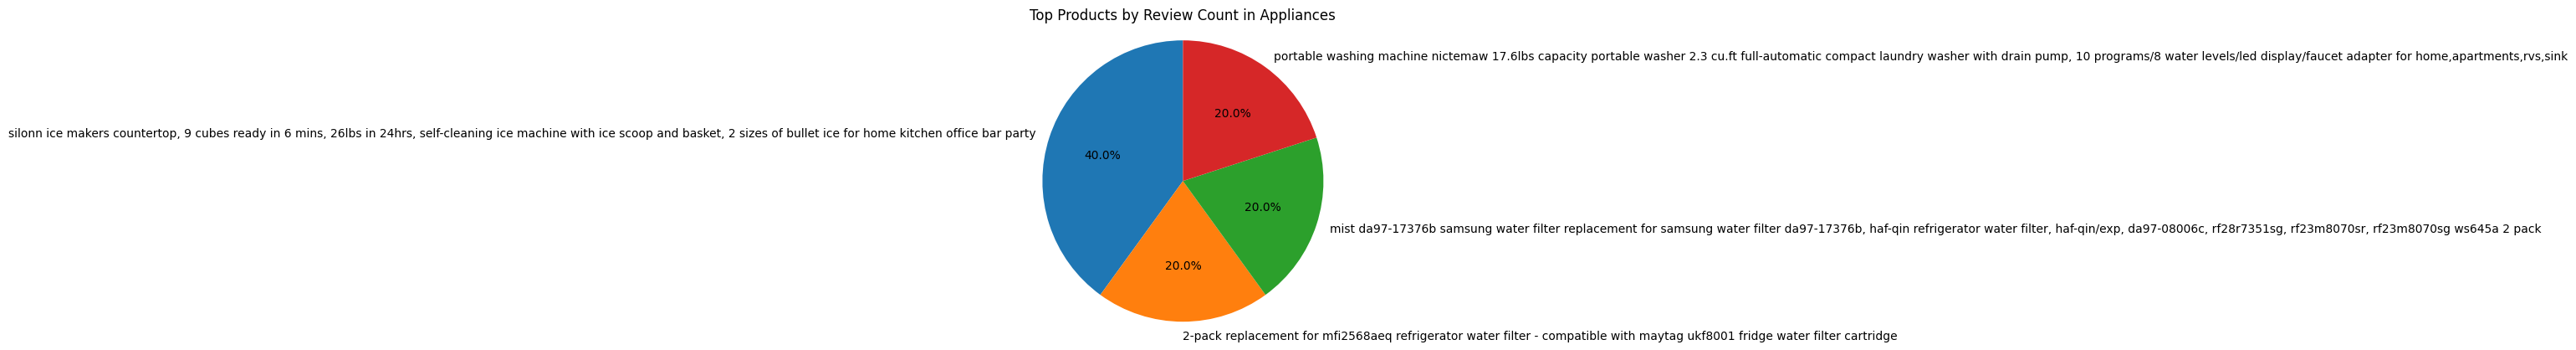

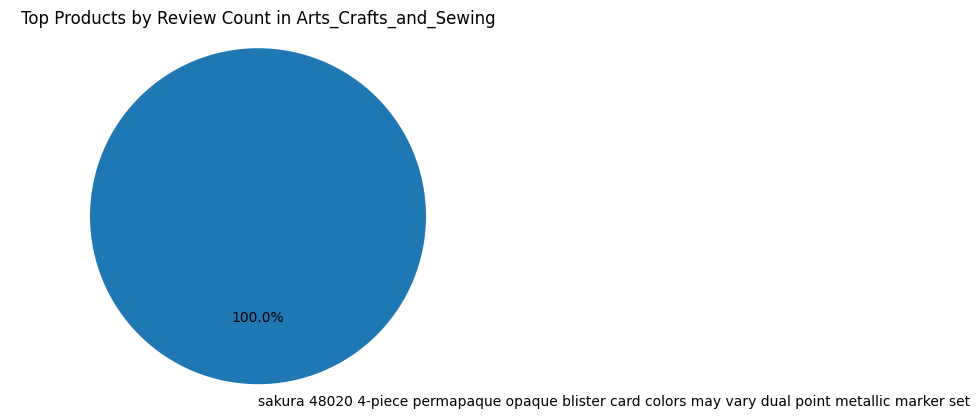

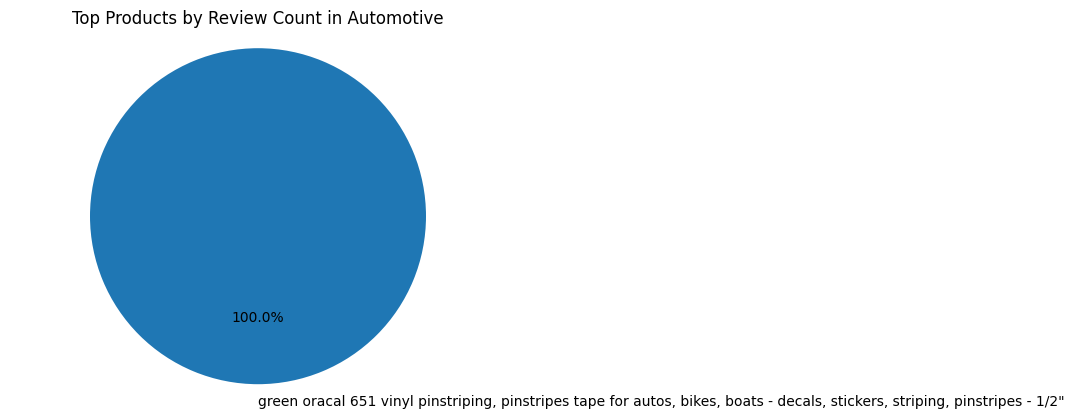

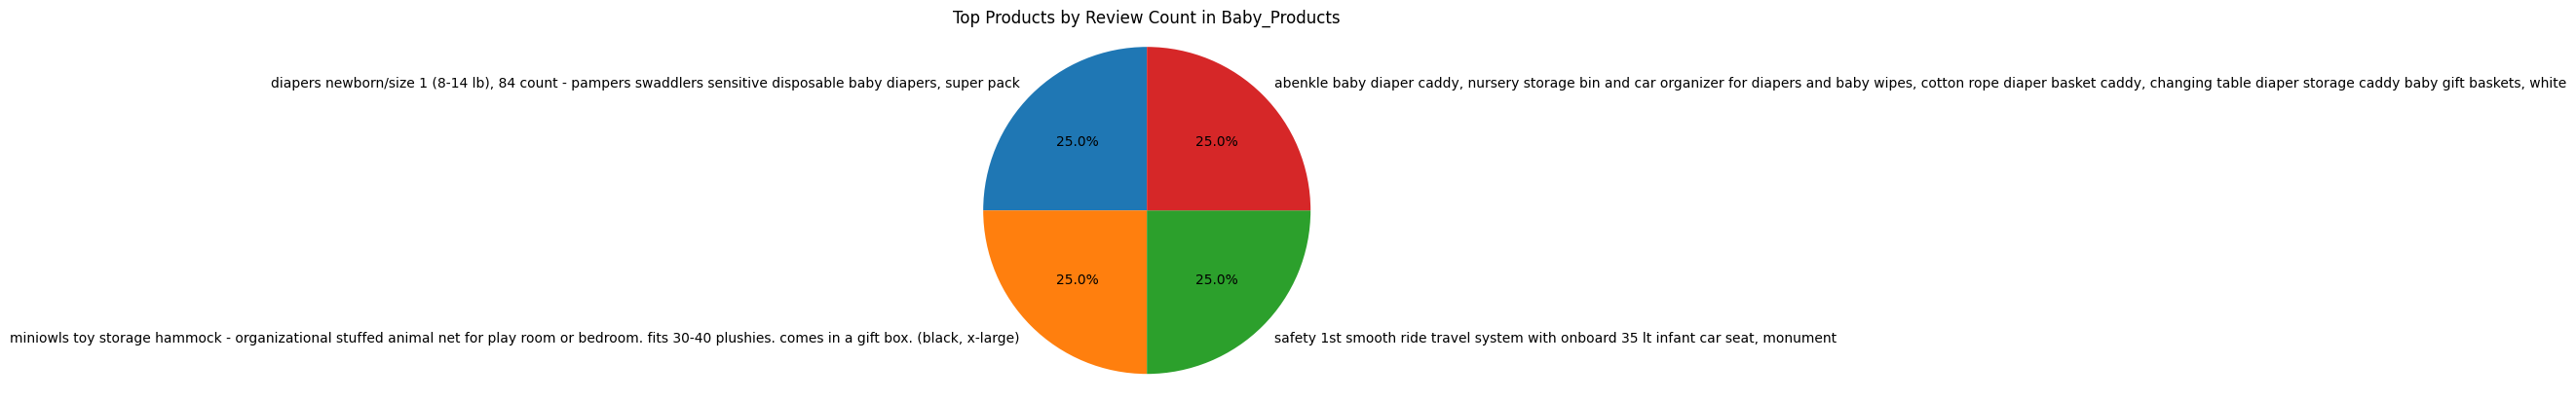

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


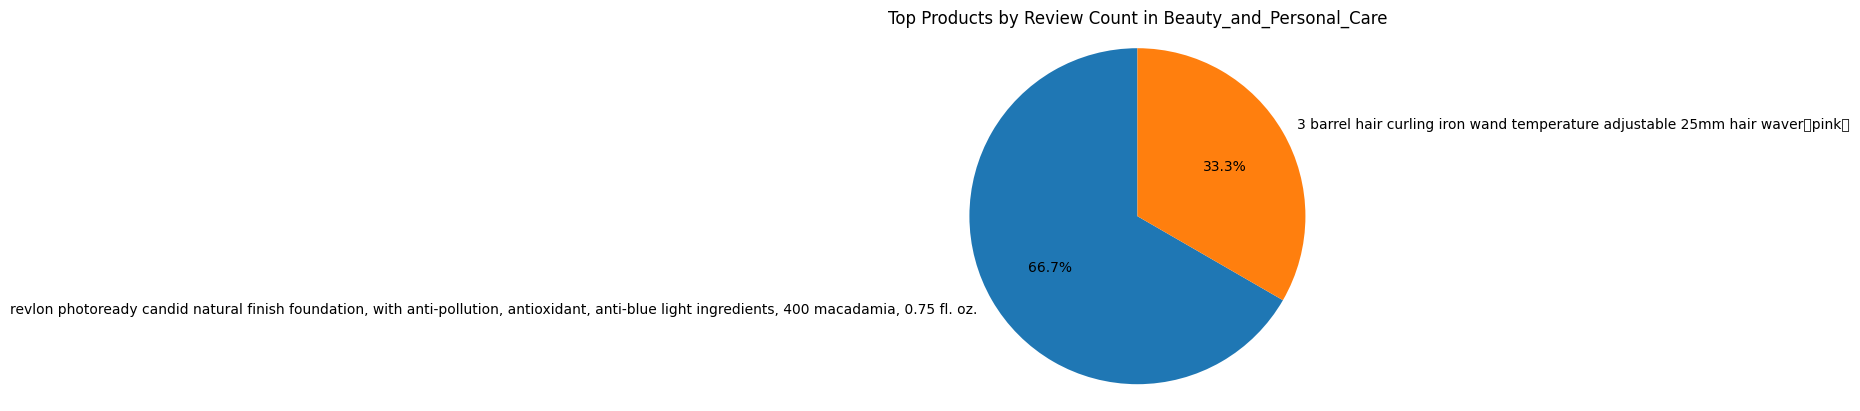

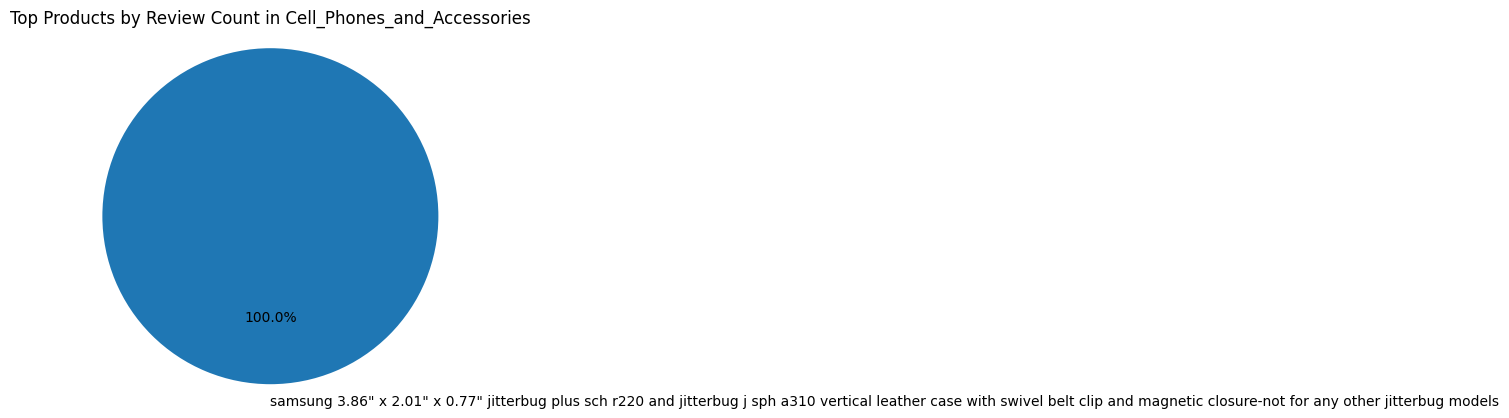

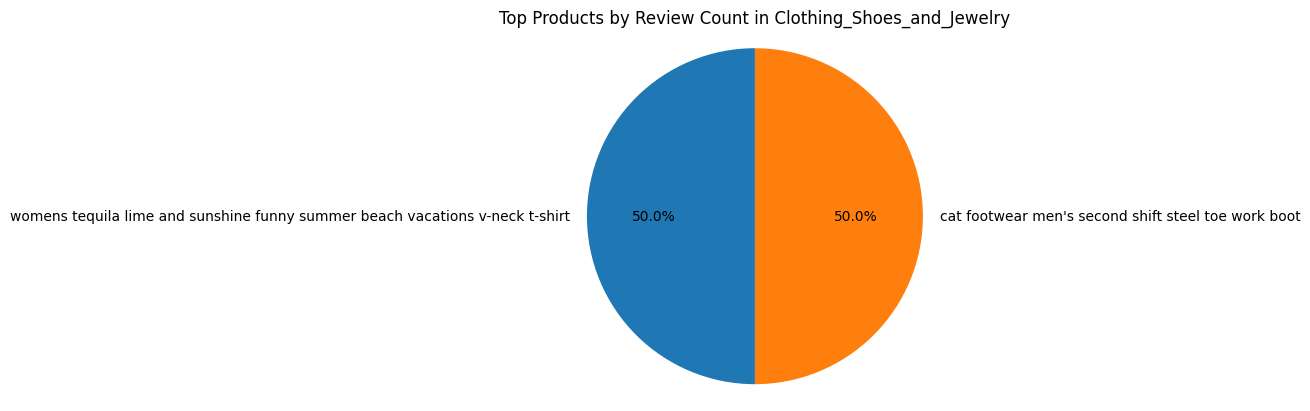

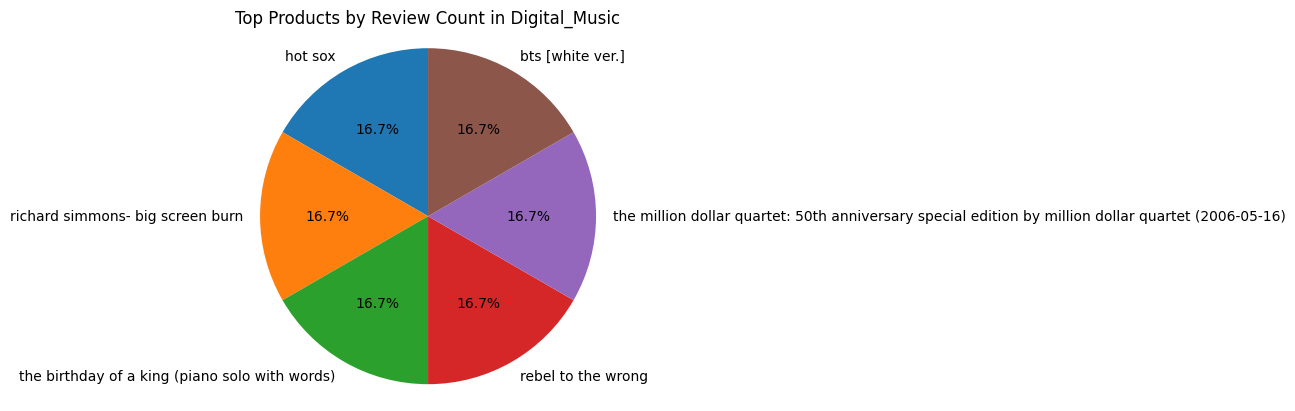

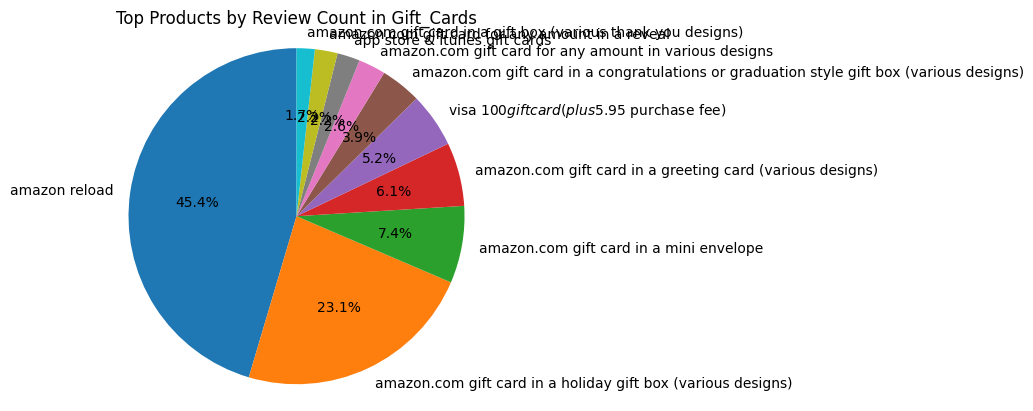

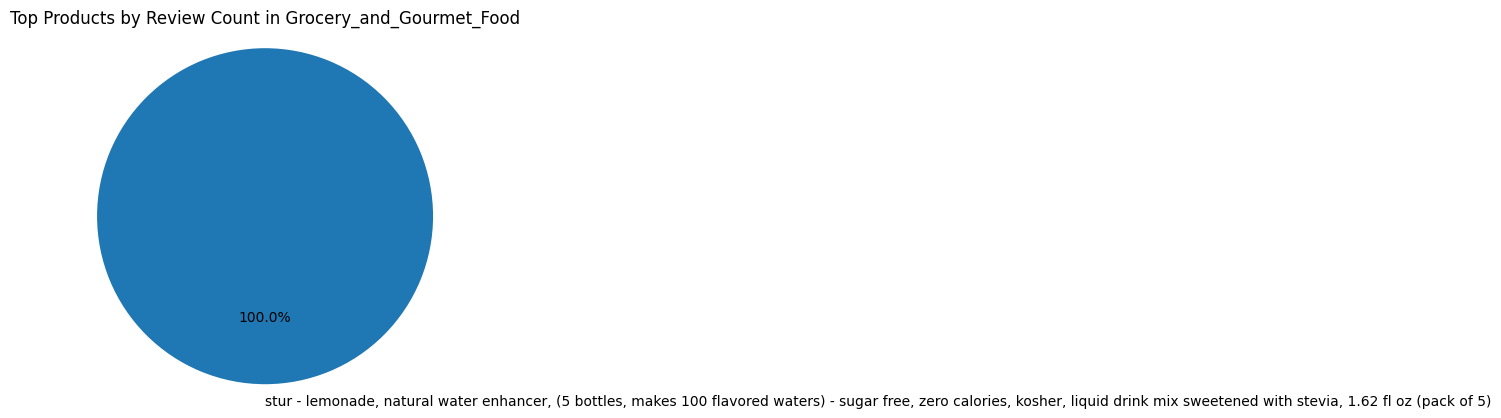

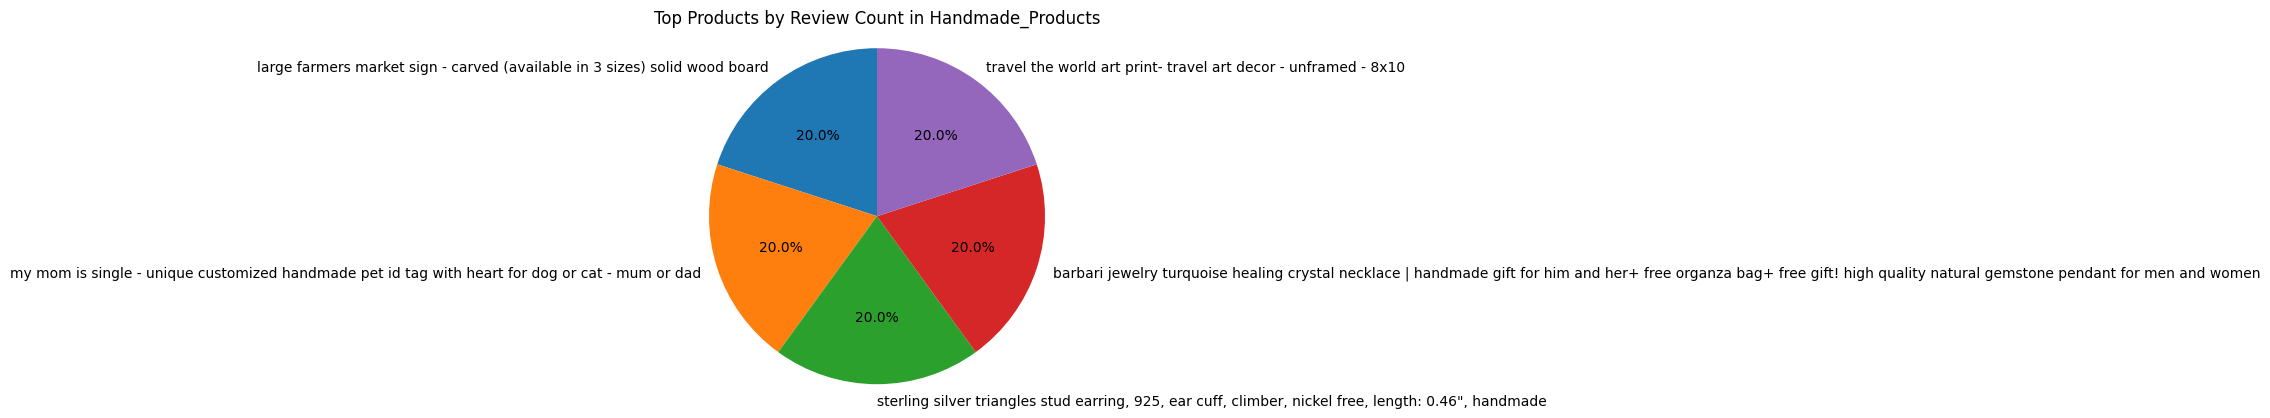

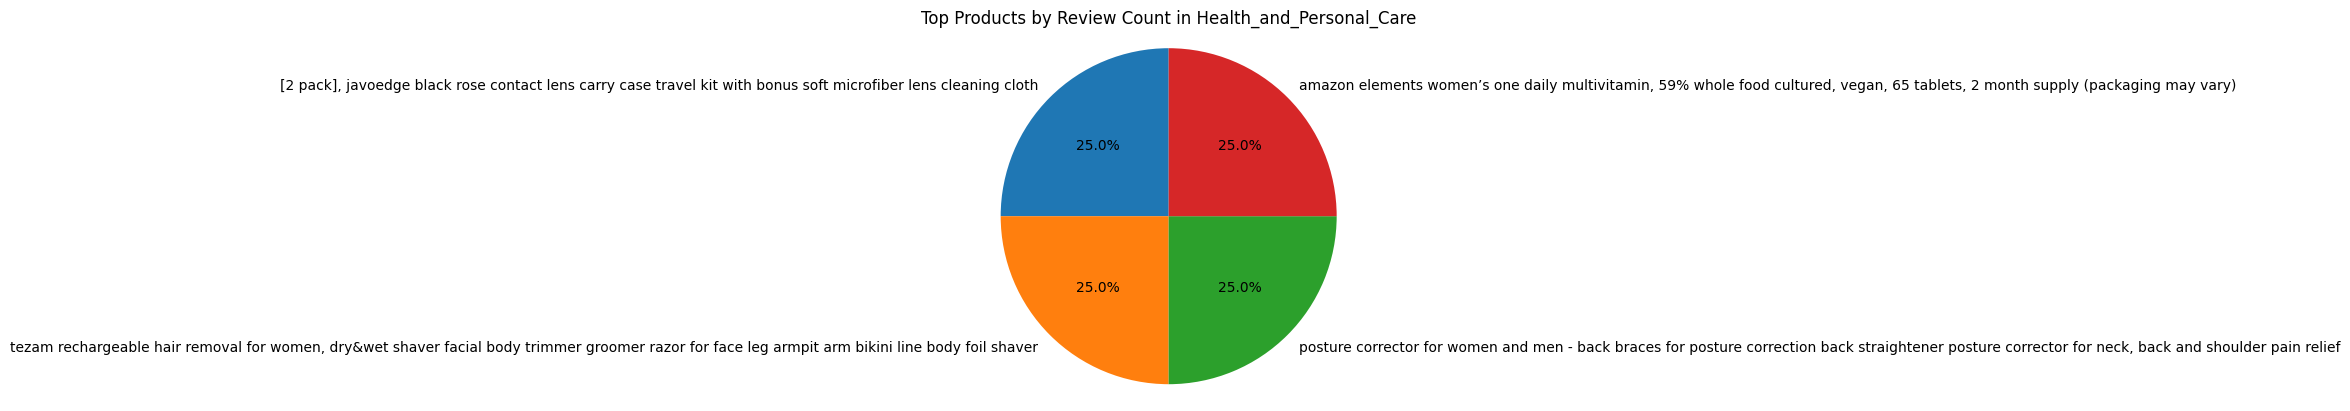

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


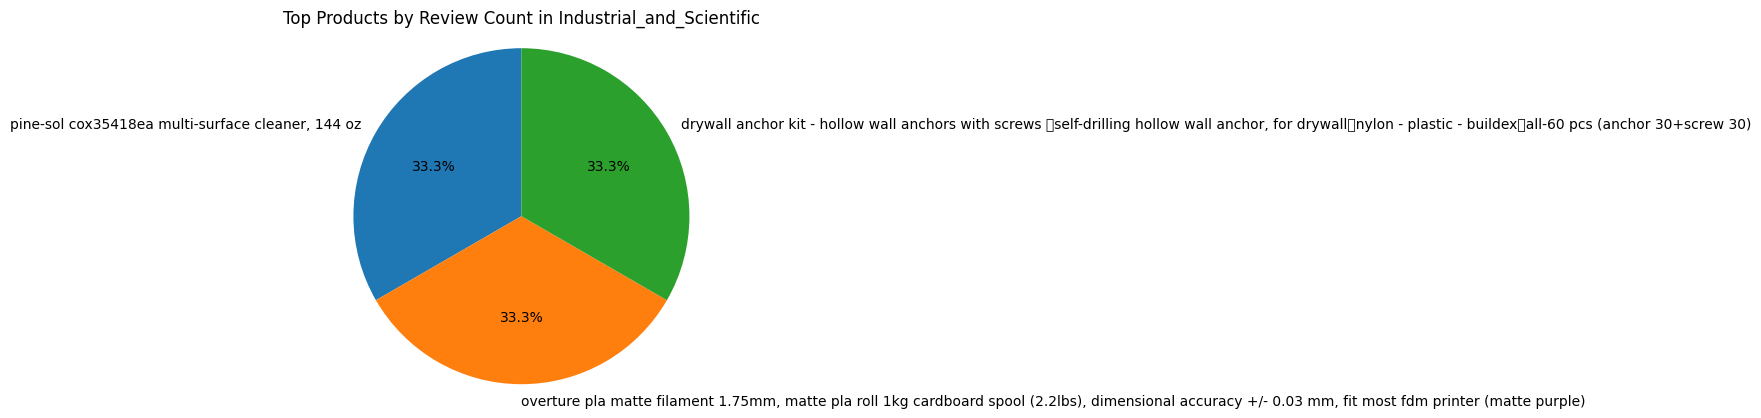

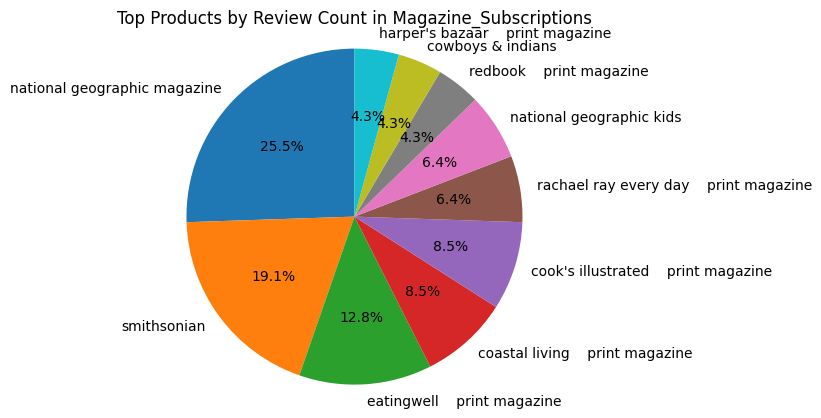

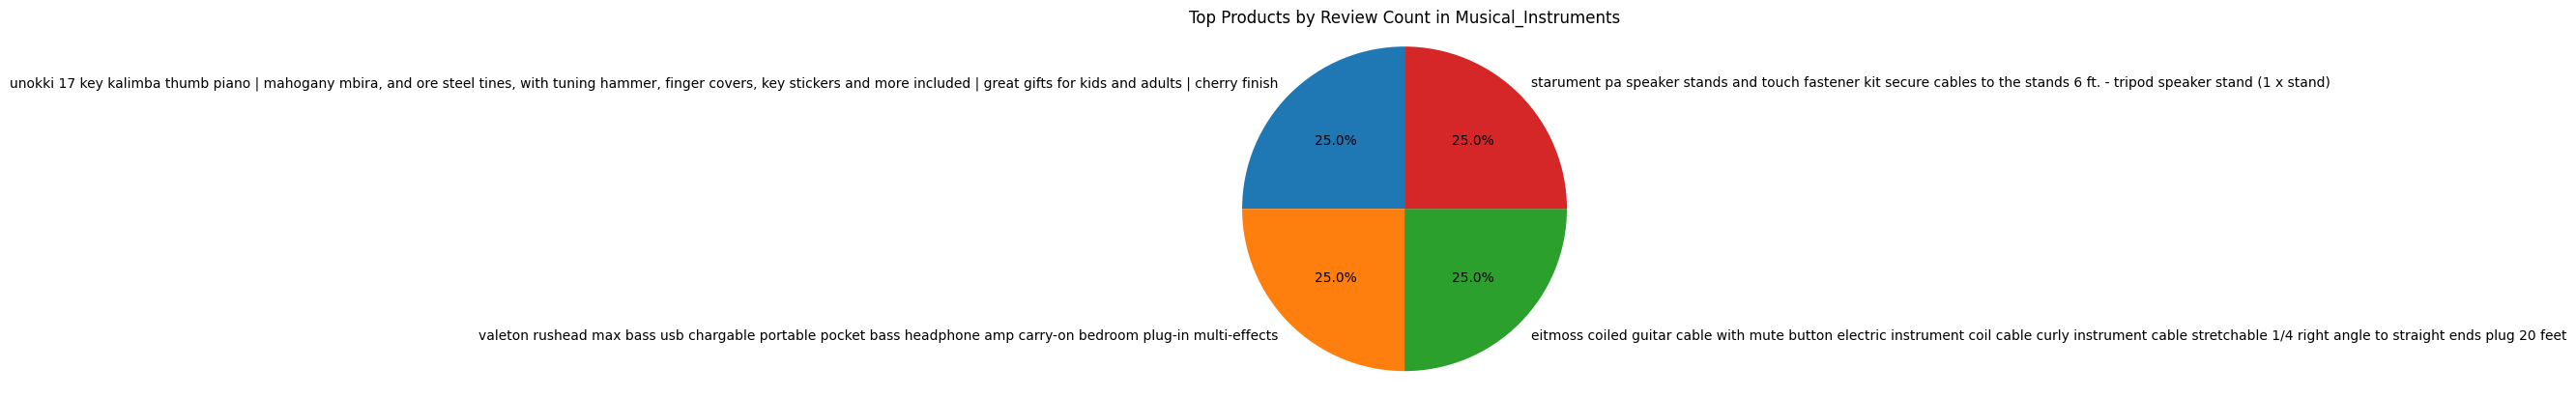

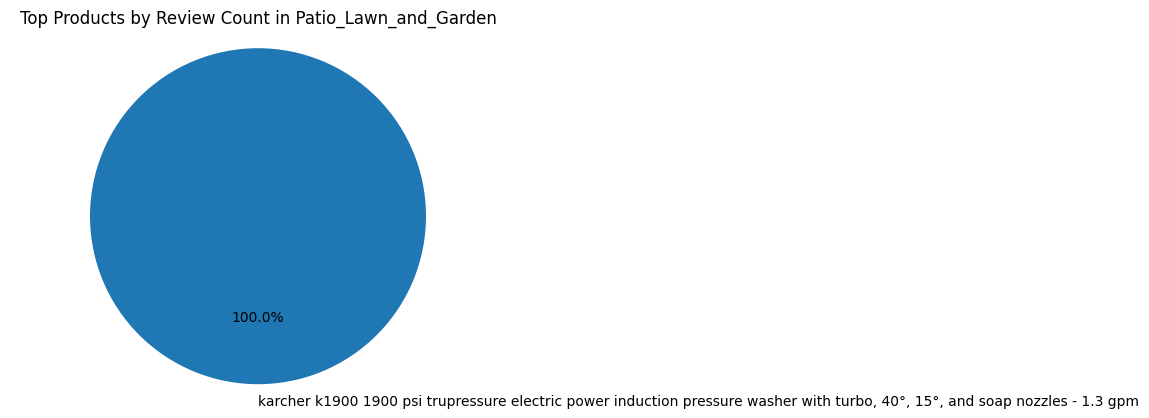

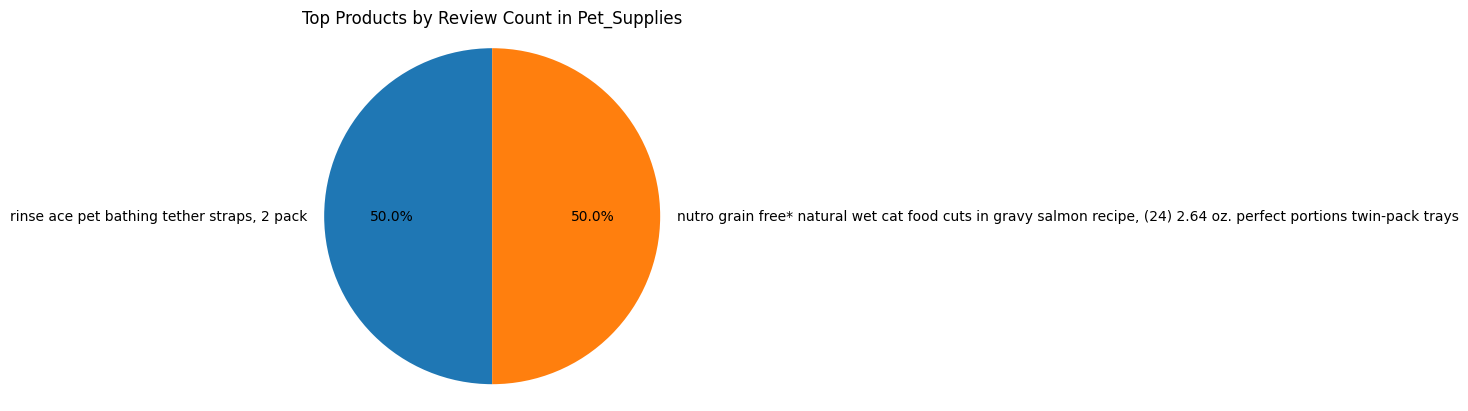

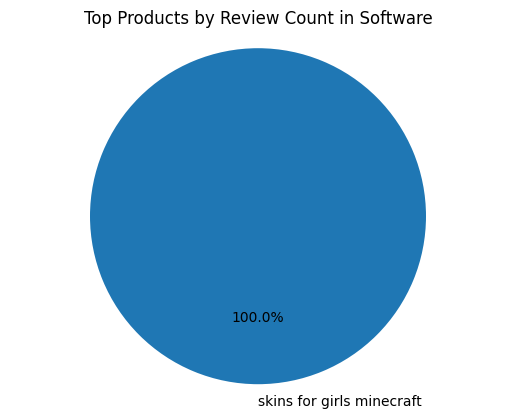

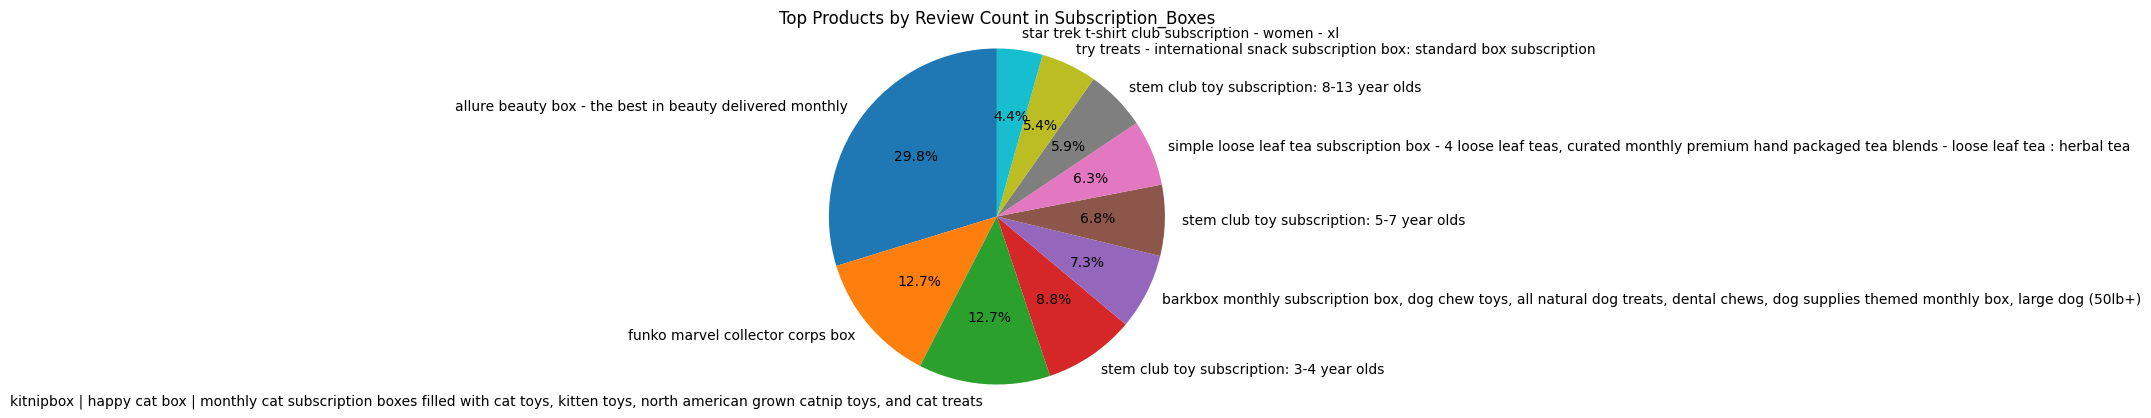

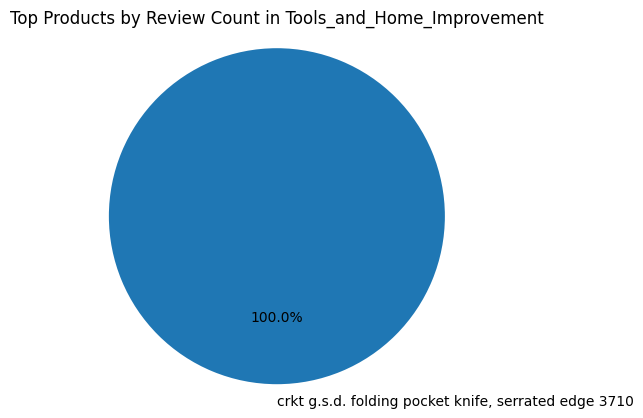

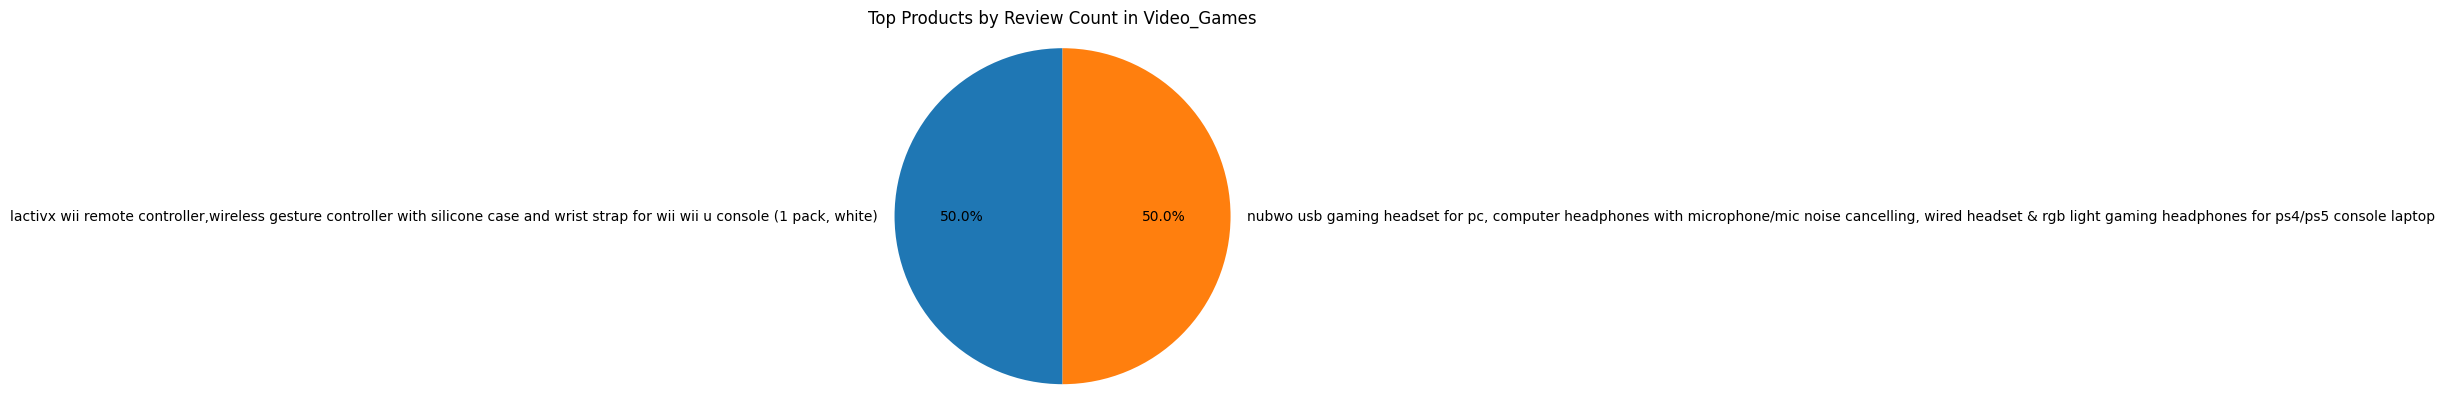

In [29]:
# frequent products (parent_asin) per category and pie plot


# group by category and product_identifier, then count reviews
product_category_counts = df.groupby(['category', 'parent_asin']).size().reset_index(name='review_count')

# create a mapping from parent_asin in meta_df to their titles
parent_asin_to_title_map = meta_df.set_index('parent_asin')['title'].to_dict()

# function to get title given product_identifier
def get_title(product_id):
    if product_id in parent_asin_to_title_map:
        return parent_asin_to_title_map[product_id]
    return None

# apply the function to get product titles
product_category_counts['title'] = product_category_counts['parent_asin'].apply(get_title)

# filter out products without titles
valid_products = product_category_counts.dropna(subset=['title'])

# get top 10 most reviewed products for each category
top_10_products = valid_products.groupby('category', group_keys=False).apply(lambda x: x.nlargest(10, 'review_count')).reset_index(drop=True)

print("Top reviewed products per category (with titles):")
display(top_10_products.sort_values(by=['category', 'review_count'], ascending=[True, False]).head(10))

# generate pie charts for each category
for category in top_10_products['category'].unique():
    category_data = top_10_products[top_10_products['category'] == category]

    if not category_data.empty:
        plt.figure()
        plt.pie(category_data['review_count'], labels=category_data['title'], autopct='%1.1f%%', startangle=90)
        plt.title(f'Top Products by Review Count in {category}')
        plt.axis('equal')
        #plt.tight_layout()
        plt.show()

### Time Series Data Visualization
visualize the time and seasonal difference inculde:
- Yearly, monthly, day/night time serires analysis

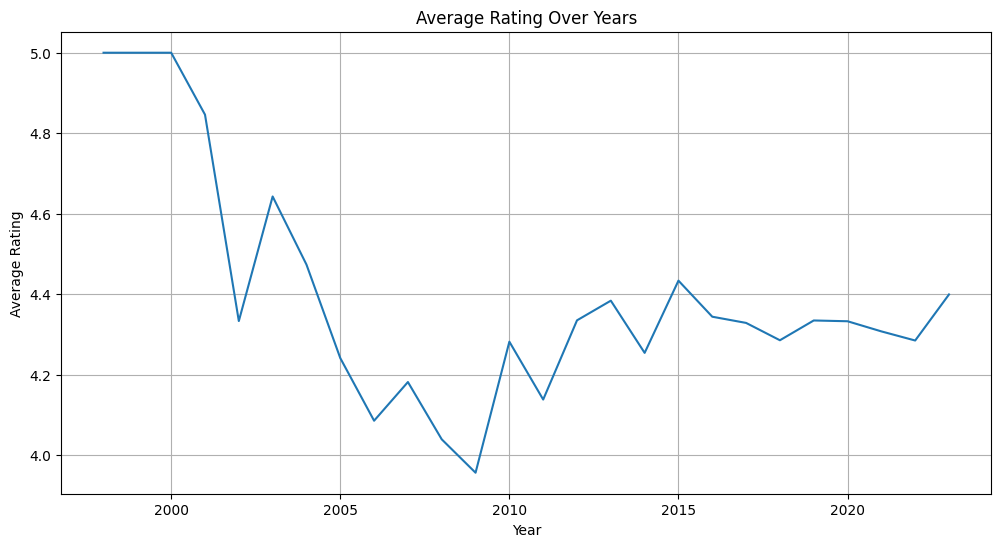

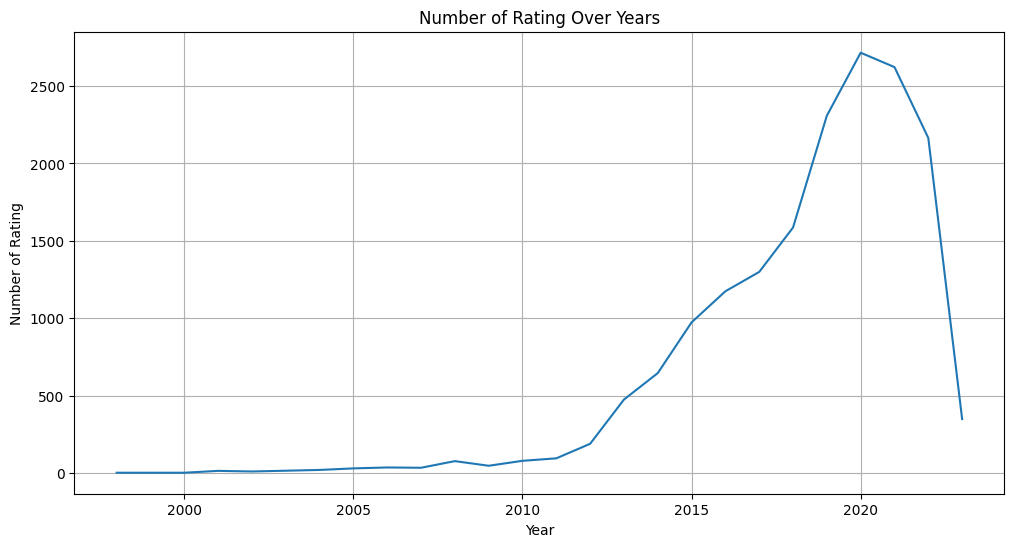

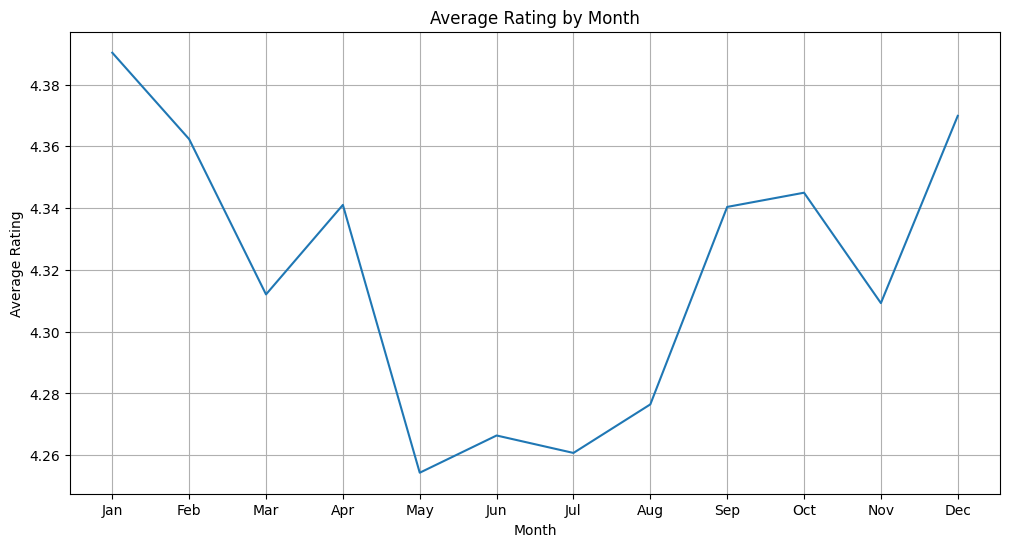

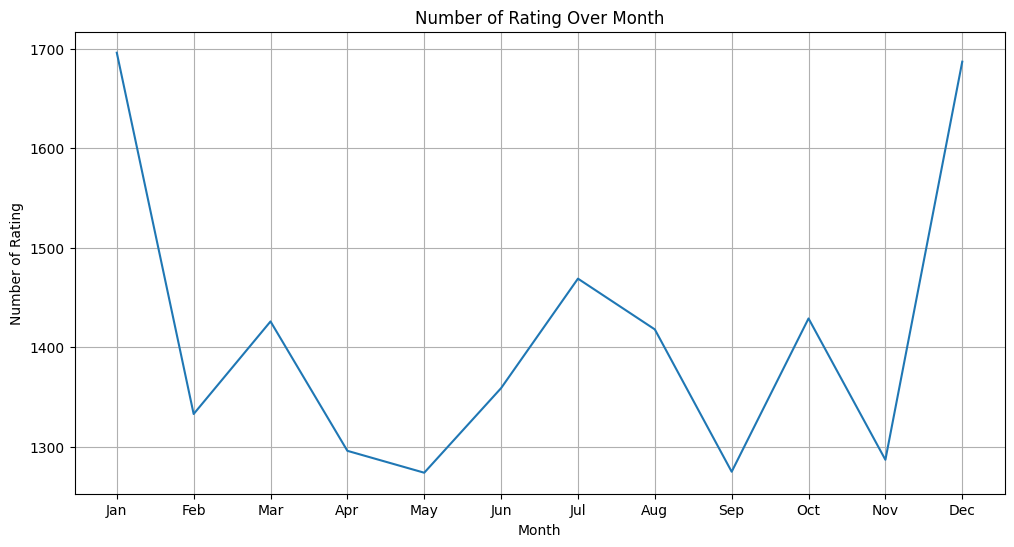

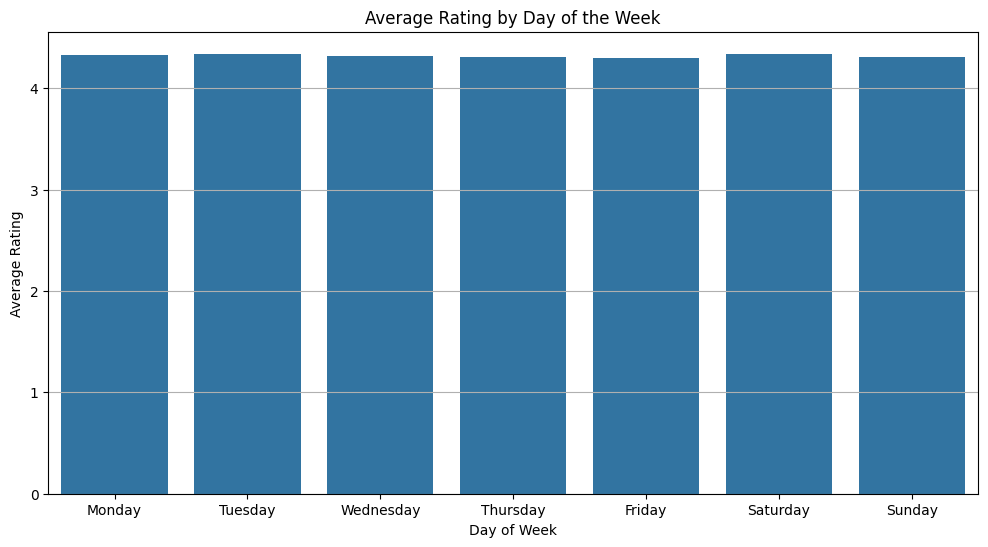

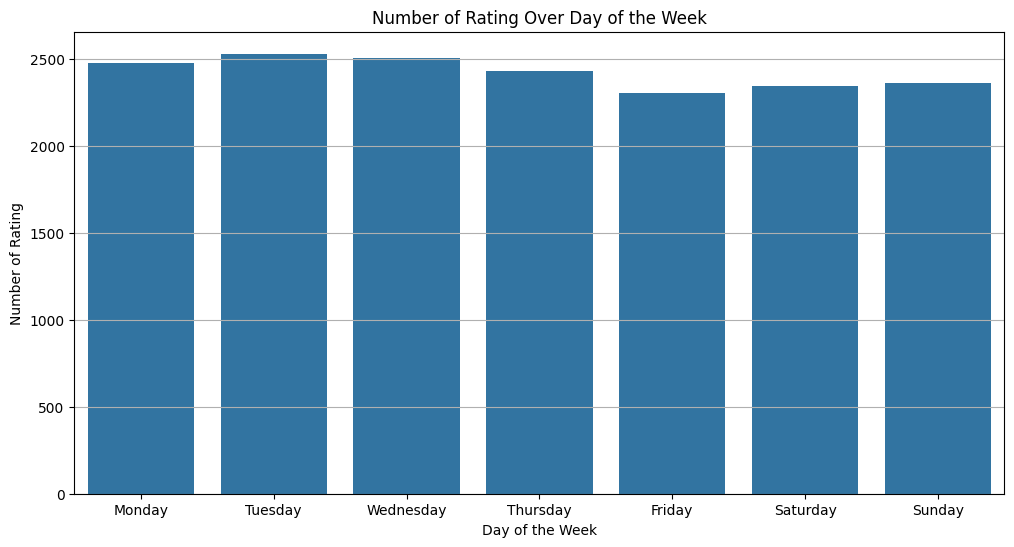

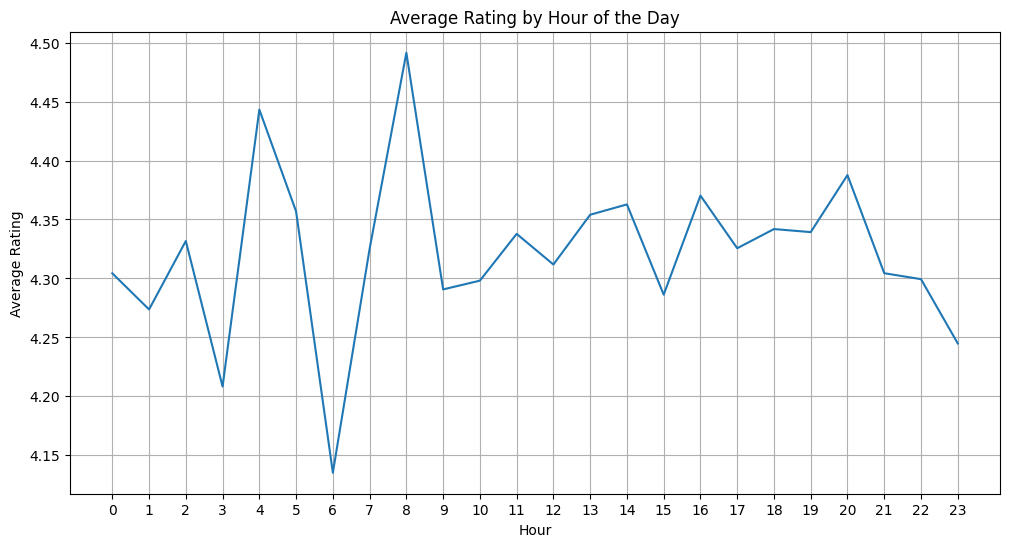

In [24]:
# convert 'datetime' column to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])
# extract time components
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

# average rating by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rating', data=df.groupby('year')['rating'].mean().reset_index())
plt.title('Average Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# number of total rating by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rating', data=df.groupby('year')['rating'].count().reset_index())
plt.title('Number of Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Rating')
plt.grid(True)
plt.show()


# average rating by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='rating', data=df.groupby('month')['rating'].mean().reset_index())
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# number of total rating by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='rating', data=df.groupby('month')['rating'].count().reset_index())
plt.title('Number of Rating Over Month')
plt.xlabel('Month')
plt.ylabel('Number of Rating')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# average rating by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='rating', data=df.groupby('day_of_week')['rating'].mean().reindex(day_order).reset_index())
plt.title('Average Rating by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Rating')
plt.grid(axis='y')
plt.show()

# number of total rating by day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='rating', data=df.groupby('day_of_week')['rating'].count().reindex(day_order).reset_index())
plt.title('Number of Rating Over Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rating')
plt.grid(axis='y')
plt.show()

# average rating by hour of the day
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='rating', data=df.groupby('hour')['rating'].mean().reset_index())
plt.title('Average Rating by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Rating')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()